# Explorações e Treinamento com o Dataset Cars

# Visualizando os dados

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

cars_df = pd.read_csv('/content/drive/MyDrive/XP/bootcamp_eng_ML/cars.csv')
cars_df.head(10)

,mpg,cylinders,cubicinches,hp,weightlbs,time-to-60,year,brand
0,14.0,8,350,165,4209,12,1972,US.
1,31.9,4,89,71,1925,14,1980,Europe.
2,17.0,8,302,140,3449,11,1971,US.
3,15.0,8,400,150,3761,10,1971,US.
4,30.5,4,98,63,2051,17,1978,US.
5,23.0,8,350,125,3900,17,1980,US.
6,13.0,8,351,158,4363,13,1974,US.
7,14.0,8,440,215,4312,9,1971,US.
8,25.4,5,183,77,3530,20,1980,Europe.
9,37.7,4,89,62,2050,17,1982,Japan.


In [ ]:
cars_df.shape

(261, 8)

In [ ]:
cars_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 261 entries, 0 to 260
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   mpg          261 non-null    float64
 1   cylinders    261 non-null    int64  
 2   cubicinches  261 non-null    object 
 3   hp           261 non-null    int64  
 4   weightlbs    261 non-null    object 
 5   time-to-60   261 non-null    int64  
 6   year         261 non-null    int64  
 7   brand        261 non-null    object 
dtypes: float64(1), int64(4), object(3)
memory usage: 16.4+ KB


In [ ]:
cars_df.isna().sum()

,0
mpg,0
cylinders,0
cubicinches,0
hp,0
weightlbs,0
time-to-60,0
year,0
brand,0


In [ ]:
cars_df.duplicated().sum()

0

In [ ]:
cars_df.describe()

,mpg,cylinders,hp,time-to-60,year
count,261.000000,261.000000,261.000000,261.000000,261.000000
mean,23.144828,5.590038,106.360153,15.547893,1976.819923
std,7.823570,1.733310,40.499959,2.910625,3.637696
min,10.000000,3.000000,46.000000,8.000000,1971.000000
25%,16.900000,4.000000,75.000000,14.000000,1974.000000
50%,22.000000,6.000000,95.000000,16.000000,1977.000000
75%,28.800000,8.000000,138.000000,17.000000,1980.000000
max,46.600000,8.000000,230.000000,25.000000,1983.000000


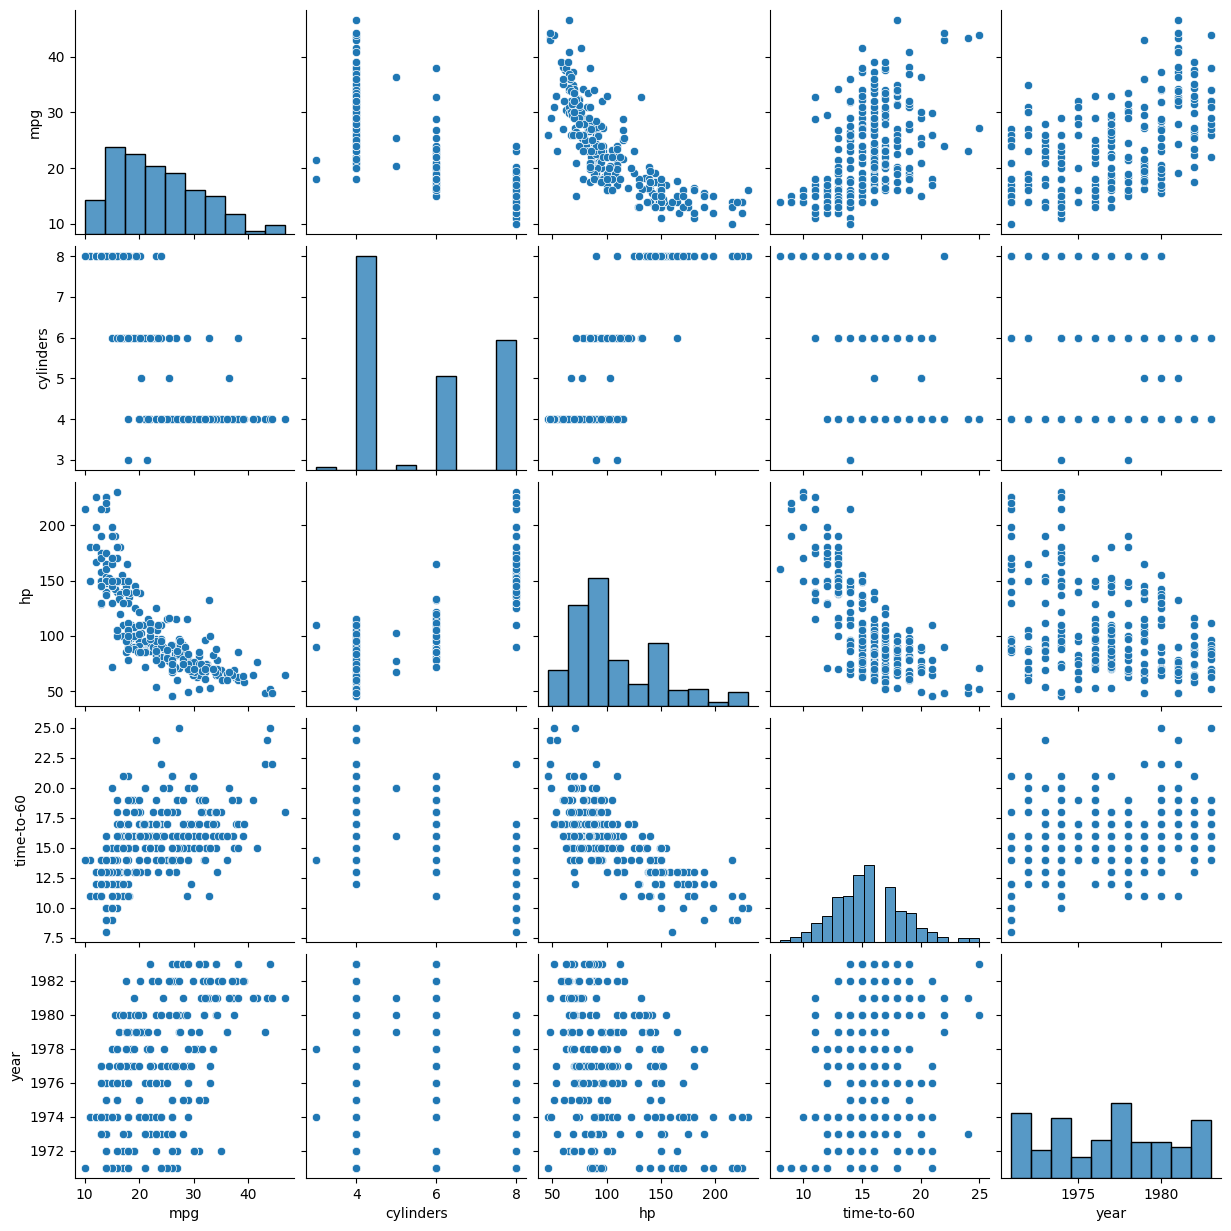

In [ ]:
sns.pairplot(cars_df)

# Pré-processamento para Clusterização

Transformando string colunas para float

In [ ]:
cars_df['cubicinches'] = pd.to_numeric(cars_df['cubicinches'], errors='coerce')
cars_df['weightlbs'] = pd.to_numeric(cars_df['weightlbs'], errors='coerce')

In [ ]:
cars_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 261 entries, 0 to 260
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   mpg          261 non-null    float64
 1   cylinders    261 non-null    int64  
 2   cubicinches  259 non-null    float64
 3   hp           261 non-null    int64  
 4   weightlbs    258 non-null    float64
 5   time-to-60   261 non-null    int64  
 6   year         261 non-null    int64  
 7   brand        261 non-null    object 
dtypes: float64(3), int64(4), object(1)
memory usage: 16.4+ KB


In [ ]:
cars_df.isna().sum()

,0
mpg,0
cylinders,0
cubicinches,2
hp,0
weightlbs,3
time-to-60,0
year,0
brand,0


In [ ]:
cars_df[cars_df['cubicinches'].isna()]

,mpg,cylinders,cubicinches,hp,weightlbs,time-to-60,year,brand
40,16.0,6,NaN,105,3897.0,19,1976,US.
180,19.8,6,NaN,85,2990.0,18,1980,US.


In [ ]:
cars_df[cars_df['weightlbs'].isna()]

,mpg,cylinders,cubicinches,hp,weightlbs,time-to-60,year,brand



Tratamento de valores nulos

In [ ]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy='mean')
cars_df['cubicinches'] = imputer.fit_transform(cars_df[['cubicinches']])
cars_df['weightlbs'] = imputer.fit_transform(cars_df[['weightlbs']])

In [ ]:
cars_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 261 entries, 0 to 260
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   mpg          261 non-null    float64
 1   cylinders    261 non-null    int64  
 2   cubicinches  261 non-null    float64
 3   hp           261 non-null    int64  
 4   weightlbs    261 non-null    float64
 5   time-to-60   261 non-null    int64  
 6   year         261 non-null    int64  
 7   brand        261 non-null    object 
dtypes: float64(3), int64(4), object(1)
memory usage: 16.4+ KB


In [ ]:
cars_df.describe()

,mpg,cylinders,cubicinches,hp,weightlbs,time-to-60,year
count,261.000000,261.000000,261.000000,261.000000,261.000000,261.000000,261.000000
mean,23.144828,5.590038,200.918919,106.360153,3009.833333,15.547893,1976.819923
std,7.823570,1.733310,108.837269,40.499959,849.097575,2.910625,3.637696
min,10.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,1971.000000
25%,16.900000,4.000000,101.000000,75.000000,2254.000000,14.000000,1974.000000
50%,22.000000,6.000000,156.000000,95.000000,2904.000000,16.000000,1977.000000
75%,28.800000,8.000000,302.000000,138.000000,3664.000000,17.000000,1980.000000
max,46.600000,8.000000,455.000000,230.000000,4997.000000,25.000000,1983.000000


Nomaliza os dados

In [ ]:
from sklearn.preprocessing import StandardScaler

cars_df.drop('brand', axis=1, inplace=True)

scaler = StandardScaler()
cars_df = pd.DataFrame(scaler.fit_transform(cars_df), columns=cars_df.columns)

In [ ]:
cars_df.describe()

,mpg,cylinders,cubicinches,hp,weightlbs,time-to-60,year
count,2.610000e+02,2.610000e+02,2.610000e+02,2.610000e+02,2.610000e+02,2.610000e+02,2.610000e+02
mean,3.266863e-16,1.837611e-16,-1.276118e-16,1.174029e-16,-1.803581e-16,-2.041789e-16,-2.637311e-15
std,1.001921e+00,1.001921e+00,1.001921e+00,1.001921e+00,1.001921e+00,1.001921e+00,1.001921e+00
min,-1.683385e+00,-1.497144e+00,-1.223609e+00,-1.493239e+00,-1.648240e+00,-2.598203e+00,-1.602966e+00
25%,-7.997404e-01,-9.191048e-01,-9.198217e-01,-7.758132e-01,-8.918710e-01,-5.328295e-01,-7.766842e-01
50%,-1.466117e-01,2.369740e-01,-4.135093e-01,-2.810368e-01,-1.248816e-01,1.556284e-01,4.959804e-02
75%,7.242265e-01,1.393053e+00,9.305202e-01,7.827325e-01,7.719060e-01,4.998573e-01,8.758803e-01
max,3.003774e+00,1.393053e+00,2.338990e+00,3.058704e+00,2.344824e+00,3.253689e+00,1.702163e+00


# Feature selection com PCA

In [ ]:
from sklearn.decomposition import PCA

pca = PCA(n_components=7)
pca.fit_transform(cars_df[['mpg', 'cylinders', 'cubicinches', 'hp', 'weightlbs', 'time-to-60', 'year']])
print(pca.explained_variance_ratio_)
print(pca.feature_names_in_[:3])

[0.72371349 0.12675138 0.09126131 0.02773591 0.01766794 0.00798425
 0.00488572]
['mpg' 'cylinders' 'cubicinches']


# Clusterização com o K-Means

In [ ]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=3,random_state=42)
kmeans.fit(cars_df[pca.feature_names_in_[:3]])

KMeans(n_clusters=3, random_state=42)

In [ ]:
kmeans.cluster_centers_

array([[-0.43269855,  0.23697401,  0.12976368],
       [ 0.78510642, -0.90576545, -0.8462471 ],
       [-1.03776954,  1.39305285,  1.3699381 ]])

In [ ]:
kmeans.labels_

array([2, 1, 2, 2, 1, 2, 2, 2, 0, 1, 1, 1, 2, 2, 0, 2, 1, 2, 1, 1, 1, 1,
       0, 2, 1, 1, 1, 2, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 2, 0, 0, 2, 0, 0,
       2, 1, 2, 1, 1, 0, 2, 1, 2, 1, 2, 2, 0, 1, 1, 2, 0, 1, 1, 1, 2, 0,
       1, 1, 1, 2, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 2, 2, 2, 1, 1, 1, 0, 0,
       1, 1, 1, 1, 2, 0, 1, 0, 2, 0, 2, 0, 2, 2, 1, 1, 1, 1, 1, 1, 1, 2,
       1, 1, 2, 1, 1, 0, 1, 0, 1, 2, 1, 1, 2, 1, 1, 1, 2, 1, 1, 1, 1, 1,
       2, 2, 2, 2, 1, 2, 1, 1, 0, 1, 1, 1, 2, 1, 0, 1, 2, 2, 1, 1, 2, 0,
       1, 0, 1, 1, 0, 0, 1, 2, 0, 0, 1, 2, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1,
       2, 2, 2, 1, 0, 1, 2, 2, 1, 0, 0, 2, 2, 2, 1, 1, 2, 2, 2, 1, 1, 1,
       1, 1, 1, 1, 0, 0, 1, 2, 1, 0, 2, 0, 0, 0, 1, 1, 0, 1, 1, 2, 0, 2,
       0, 1, 2, 0, 2, 1, 2, 1, 0, 1, 2, 1, 1, 2, 1, 1, 2, 0, 1, 1, 2, 0,
       2, 1, 2, 2, 2, 1, 1, 1, 1, 1, 1, 2, 0, 1, 2, 1, 0, 0, 0],
      dtype=int32)

In [ ]:
pd.DataFrame(kmeans.labels_).value_counts()

,count
0,
1,130
2,75
0,56


# Preprocessamento para Classificação

In [ ]:
c_cars_df = pd.read_csv('/content/drive/MyDrive/XP/bootcamp_eng_ML/cars.csv')
c_cars_df.head()

,mpg,cylinders,cubicinches,hp,weightlbs,time-to-60,year,brand
0,14.0,8,350,165,4209,12,1972,US.
1,31.9,4,89,71,1925,14,1980,Europe.
2,17.0,8,302,140,3449,11,1971,US.
3,15.0,8,400,150,3761,10,1971,US.
4,30.5,4,98,63,2051,17,1978,US.


In [ ]:
c_cars_df['efficiency'] =  c_cars_df['mpg'].map(lambda x: 1 if x > 25 else 0)

In [ ]:
c_cars_df.head()

,mpg,cylinders,cubicinches,hp,weightlbs,time-to-60,year,brand
0,14.0,8,350,165,4209,12,1972,US.
1,31.9,4,89,71,1925,14,1980,Europe.
2,17.0,8,302,140,3449,11,1971,US.
3,15.0,8,400,150,3761,10,1971,US.
4,30.5,4,98,63,2051,17,1978,US.


In [ ]:
c_cars_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 261 entries, 0 to 260
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   mpg          261 non-null    float64
 1   cylinders    261 non-null    int64  
 2   cubicinches  261 non-null    object 
 3   hp           261 non-null    int64  
 4   weightlbs    261 non-null    object 
 5   time-to-60   261 non-null    int64  
 6   year         261 non-null    int64  
 7   brand        261 non-null    object 
dtypes: float64(1), int64(4), object(3)
memory usage: 16.4+ KB


Transformando atributos object para float

In [ ]:
c_cars_df['cubicinches'] = pd.to_numeric(cars_df['cubicinches'], errors='coerce')
c_cars_df['weightlbs'] = pd.to_numeric(cars_df['weightlbs'], errors='coerce')

Tratando valores nulos

In [ ]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy='mean')
c_cars_df['cubicinches'] = imputer.fit_transform(cars_df[['cubicinches']])
c_cars_df['weightlbs'] = imputer.fit_transform(cars_df[['weightlbs']])

In [ ]:
c_cars_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 261 entries, 0 to 260
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   mpg          261 non-null    float64
 1   cylinders    261 non-null    int64  
 2   cubicinches  261 non-null    float64
 3   hp           261 non-null    int64  
 4   weightlbs    261 non-null    float64
 5   time-to-60   261 non-null    int64  
 6   year         261 non-null    int64  
 7   brand        261 non-null    object 
dtypes: float64(3), int64(4), object(1)
memory usage: 16.4+ KB


Separando dados entre amostra e treino

In [ ]:
from sklearn.model_selection import train_test_split

X = c_cars_df[[ 'cylinders' ,'cubicinches' ,'hp' ,'weightlbs' ,'time-to-60']]
y = c_cars_df['efficiency']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30,random_state=42)

Nomarlização dos dados

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Implentação do DecisionTreeClassifier

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, classification_report

tree = DecisionTreeClassifier(random_state=42)

tree.fit(X_train, y_train)

tree_y_pred = tree.predict(X_test)

print(classification_report(y_test, tree_y_pred))
print(confusion_matrix(y_test, tree_y_pred))

              precision    recall  f1-score   support

           0       0.94      0.80      0.87        41
           1       0.82      0.95      0.88        38

    accuracy                           0.87        79
   macro avg       0.88      0.88      0.87        79
weighted avg       0.88      0.87      0.87        79

[[33  8]
 [ 2 36]]


# Implementação LogisticRegression

In [ ]:
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression(random_state=42)

logreg.fit(X_train, y_train)

logreg_y_pred = logreg.predict(X_test)

print(classification_report(y_test, logreg_y_pred))
print(confusion_matrix(y_test, logreg_y_pred))

              precision    recall  f1-score   support

           0       0.86      0.88      0.87        41
           1       0.86      0.84      0.85        38

    accuracy                           0.86        79
   macro avg       0.86      0.86      0.86        79
weighted avg       0.86      0.86      0.86        79

[[36  5]
 [ 6 32]]
